In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

In [69]:
df = pd.read_excel("Datos_banxico.xlsx")
df.head()

c:\Users\Oscar Javier\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Banco de México,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tasas y precios de referencia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tasas de interés representativas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fecha de consulta: 10/10/2022 09:44:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
new_df = df[['Banco de México','Unnamed: 5']]
new_df = new_df.drop([0,1,2,3,4,5,6,7,8,9,10])
new_df.columns = ['Fecha','Tasa']
new_df.head()

,Fecha,Tasa
11,2008-01-02 00:00:00,7.93
12,2008-01-03 00:00:00,7.9362
13,2008-01-04 00:00:00,7.9312
14,2008-01-07 00:00:00,7.9275
15,2008-01-08 00:00:00,7.9262


In [71]:
new_df.reset_index(drop=True, inplace=True)
new_df.head()

,Fecha,Tasa
0,2008-01-02 00:00:00,7.93
1,2008-01-03 00:00:00,7.9362
2,2008-01-04 00:00:00,7.9312
3,2008-01-07 00:00:00,7.9275
4,2008-01-08 00:00:00,7.9262


In [72]:
new_df.count()

Fecha    5299
Tasa     5299
dtype: int64

In [73]:
new_df.loc[new_df['Tasa']=='N/E'].count()


Fecha    1581
Tasa     1581
dtype: int64

In [74]:
clean_df = new_df[new_df.Tasa != 'N/E']
clean_df.count()

Fecha    3718
Tasa     3718
dtype: int64

In [75]:
clean_df = clean_df.tail(253)
clean_df.count()

Fecha    253
Tasa     253
dtype: int64

In [76]:
h = 1/253

In [77]:
clean_df.reset_index(drop=True, inplace=True)

In [78]:
clean_df['Tasa'].head()

0    4.9862
1    4.9825
2    4.9857
3    4.9806
4    4.9855
Name: Tasa, dtype: object

In [79]:
clean_df['Incrementos'] = 0
for i in range(len(clean_df['Tasa'])):
    if i > 0:
        clean_df['Incrementos'][i] = (np.log(clean_df['Tasa'][i]) - np.log(clean_df['Tasa'][i-1]))

clean_df.head()

C:\Users\Oscar Javier\AppData\Local\Temp\ipykernel_8640\2804429316.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Incrementos'][i] = (np.log(clean_df['Tasa'][i]) - np.log(clean_df['Tasa'][i-1]))


,Fecha,Tasa,Incrementos
0,2021-10-12 00:00:00,4.9862,0.000000
1,2021-10-13 00:00:00,4.9825,-0.000742
2,2021-10-14 00:00:00,4.9857,0.000642
3,2021-10-15 00:00:00,4.9806,-0.001023
4,2021-10-18 00:00:00,4.9855,0.000983


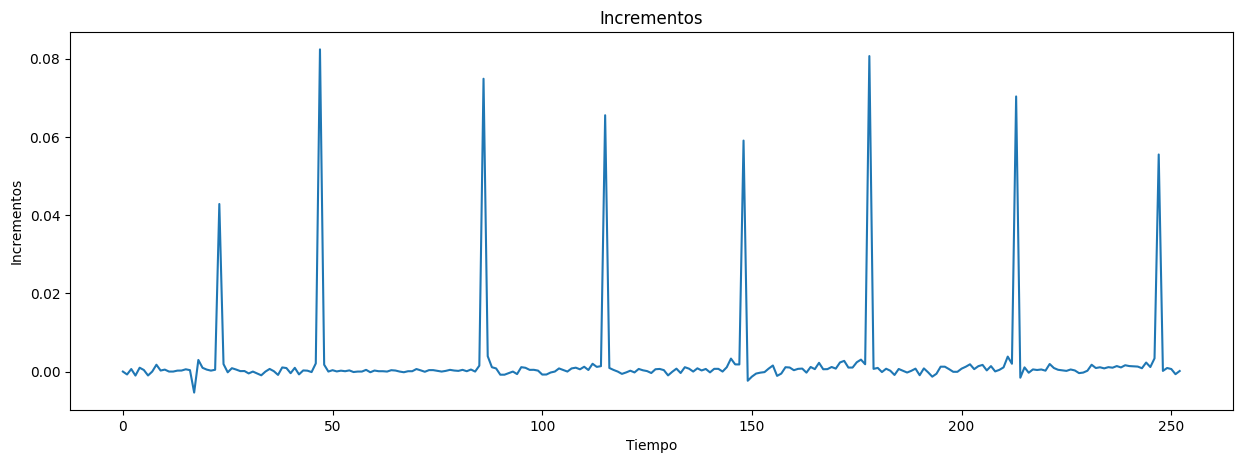

In [80]:
# Grafica de los incrementos
plt.figure(figsize=(15,5), dpi=100, facecolor='w', edgecolor='k', frameon=True, clear=True)
plt.plot(clean_df['Incrementos'])
plt.title('Incrementos')
plt.xlabel('Tiempo')
plt.ylabel('Incrementos')
plt.show()

In [81]:
media_x = clean_df['Incrementos'].mean()
varianza_x = clean_df['Incrementos'].var()

print(media_x, varianza_x)

0.002567195646482264 0.00013965534149767837


In [82]:
mu = (media_x/h)+(varianza_x/(2*h))
sigma = (math.sqrt(varianza_x)/math.sqrt(h))

print(mu, sigma)

0.6671668992594691 0.1879702141269


In [163]:
res_exp = []
t=list(range(0,253))
for i in range(500):
    random_vars = np.random.normal(0,1,253)
    s = 100
    new_list = []

    for j in random_vars:
        x_i = (mu*h) - (((sigma**2)/2)*h) + (sigma*math.sqrt(h)*j)
        new_list.append(x_i)
    for x in range(len(new_list)):
        values_sum = sum(new_list[0:x+1])
        exp_lista = s * math.exp(values_sum)
        res_exp.append(exp_lista)

S = np.array(res_exp).mean()
print(S)

141.03446001702483


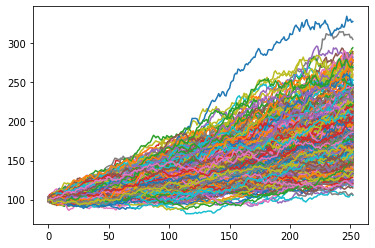

In [164]:
for i in range(2,501):
    if i==0:
        plt.plot(t,res_exp[0:253])

    plt.plot(t,res_exp[253*(i-1):253*i])

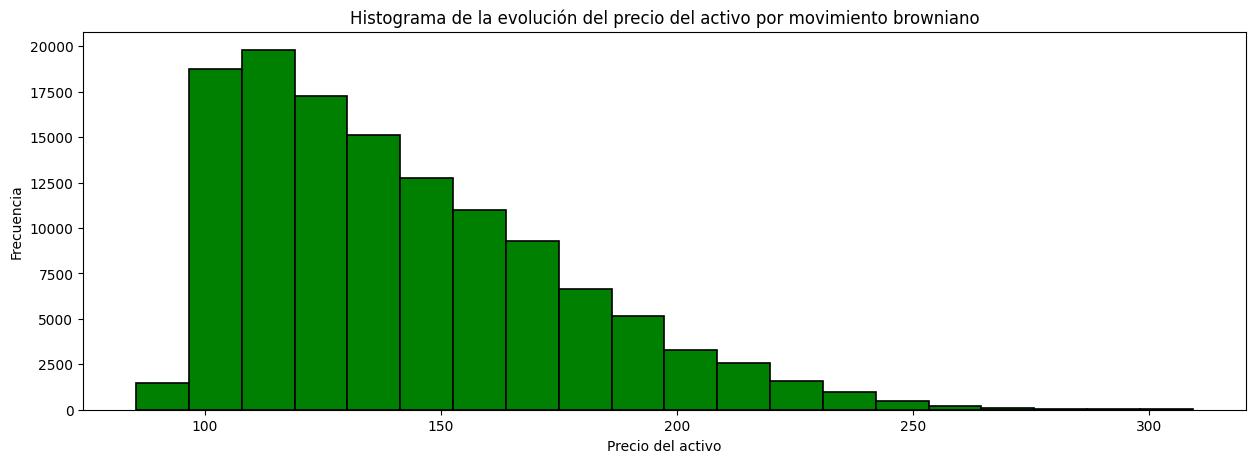

In [156]:
plt.figure(figsize=(15,5), dpi=100, facecolor='w', edgecolor='k')
plt.hist(res_exp, bins=20, color = 'green', edgecolor = 'black', linewidth = 1.2)
plt.title('Histograma de la evolución del precio del activo por movimiento browniano')
plt.xlabel('Precio del activo')
plt.ylabel('Frecuencia')
plt.show()


In [165]:
K = 105
Libor = int(clean_df['Tasa'][252]*10)
libor = Libor
T = 253
t = 0
tao = T-t
r = np.log(1+(libor/100))
d_1 = (np.log(S/K) + (r + sigma**2/2)*tao) / (sigma*np.sqrt(tao))
d_2 = d_1 - sigma*math.sqrt(tao)
print(d_1, d_2,r)

58.10509424360629 55.11524495745073 0.6678293725756554


In [166]:
from scipy.stats import norm
N = norm.cdf
C = (S)*N(d_1) - K*math.exp(-r*(tao))*(N(d_2))
print(C)

141.03446001702483
